**Preparation**
1. Download [CelebAMask-HQ.zip](https://github.com/switchablenorms/CelebAMask-HQ#celebamask-hq-dataset-downloads)
2. Extract CelebAMask-HQ.zip

**Dataset Directory Structure**
```
Dataset
├─ CelebAMask-HQ
|  ├─ CelebA-HQ-img
|  ├─ CelebAMask-HQ-mask-anno
|  ├─ CelebA-HQ-to-CelebA-mapping.txt
|  ├─ CelebAMask-HQ-pose-anno.txt
|  ├─ CelebAMask-HQ-attribute-anno.txt
|  └─ README.txt
|
├─ train
|  ├─ photo
|  └─ sketch
|
├─ test
|  ├─ photo
|  └─ sketch
|
└─ Dataset.ipynb
```

#### Initialize

In [1]:
import os, random, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
folder_CelebAMaskHQ_root = 'CelebAMask-HQ'
folder_CelebAMaskHQ_image = 'CelebA-HQ-img'
file_CelebAMaskHQ_pose = 'CelebAMask-HQ-pose-anno.txt'
file_CelebAMaskHQ_attribute = 'CelebAMask-HQ-attribute-anno.txt'

folder_train = 'train'
folder_test = 'test'
folder_photo = 'photo'
folder_sketch = 'sketch'

In [3]:
image_file_names = os.listdir(os.path.join(folder_CelebAMaskHQ_root, folder_CelebAMaskHQ_image))
print(len(image_file_names), image_file_names[:5])

30000 ['14968.jpg', '17407.jpg', '13853.jpg', '21559.jpg', '29674.jpg']


#### Check Faces Direction

In [4]:
poses = pd.DataFrame()
with open( os.path.join(folder_CelebAMaskHQ_root, file_CelebAMaskHQ_pose) ) as f:
    f.readline()
    columns = f.readline().split()
    data = f.readlines()
    data = np.array([datum.split() for datum in data])
    for i, column in enumerate(columns):
        poses[column] = data[:,i+1]
    poses = poses.astype(float)
    poses = poses.set_index(data[:,0])
    
poses

,Yaw,Pitch,Raw
0.jpg,-16.761650,-3.540695,-0.468292
1.jpg,8.853630,-16.055931,-1.150886
2.jpg,35.265182,-6.890411,-1.581253
3.jpg,-16.793152,1.010948,0.133667
4.jpg,5.474228,-12.340668,-0.894409
...,...,...,...
29995.jpg,0.108932,-0.664413,0.135849
29996.jpg,4.065002,-1.689423,-1.262672
29997.jpg,5.378021,-12.933311,1.843475
29998.jpg,16.967903,-6.059593,-3.954010


In [5]:
lower_poses_threshold = -15
upper_poses_threshold = 15

In [6]:
new_image_file_names = []
for image_file_name in image_file_names:
    eligible = True
    for value in poses.loc[image_file_name]:
        if value < lower_poses_threshold or value > upper_poses_threshold:
            eligible = False
    if eligible: new_image_file_names.append(image_file_name)
    
image_file_names = new_image_file_names
print(len(image_file_names), image_file_names[:5])

18387 ['17407.jpg', '13853.jpg', '21559.jpg', '28841.jpg', '27322.jpg']


#### Check Faces Attributes

In [7]:
attributes = pd.DataFrame()
with open( os.path.join(folder_CelebAMaskHQ_root, file_CelebAMaskHQ_attribute) ) as f:
    f.readline()
    columns = f.readline().split()
    data = f.readlines()
    data = np.array([datum.split() for datum in data])
    for i, column in enumerate(columns):
        attributes[column] = data[:,i+1]
    attributes = attributes.astype(int)
    attributes = attributes.set_index(data[:,0])
    
attributes

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0.jpg,-1,1,1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
1.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
2.jpg,-1,-1,1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
3.jpg,-1,-1,1,-1,-1,-1,-1,1,1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
4.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,1,-1,-1
29996.jpg,1,-1,-1,1,-1,-1,-1,1,-1,-1,...,1,1,-1,-1,-1,-1,-1,-1,-1,1
29997.jpg,-1,-1,-1,-1,-1,1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
29998.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [8]:
not_allowed_attributes = ['Eyeglasses', 'Wearing_Hat']

In [9]:
new_image_file_names = []
for image_file_name in image_file_names:
    eligible = True
    for not_allowed_attribute in not_allowed_attributes:
        if attributes.loc[image_file_name][not_allowed_attribute] == 1:
            eligible = False
    if eligible: new_image_file_names.append(image_file_name)
    
image_file_names = new_image_file_names
print(len(image_file_names), image_file_names[:5])

16909 ['17407.jpg', '13853.jpg', '21559.jpg', '28841.jpg', '27322.jpg']


#### Convert Train and Test Images

In [10]:
n_train_sample = 15000
assert(n_train_sample <= len(image_file_names))

random.shuffle(image_file_names)
train_image_file_names = image_file_names[:n_train_sample]
test_image_file_names = image_file_names[n_train_sample:]

# train_image_file_names = image_file_names[:10]
# test_image_file_names = image_file_names[10:15]

print(len(train_image_file_names), train_image_file_names[:5])
print(len(test_image_file_names), test_image_file_names[:5])

15000 ['8596.jpg', '13341.jpg', '21266.jpg', '26645.jpg', '17639.jpg']
1909 ['26342.jpg', '15834.jpg', '5571.jpg', '28997.jpg', '4468.jpg']


#### Copy Images to Photo Folder

In [11]:
os.makedirs( os.path.join(folder_train, folder_photo) )
os.makedirs( os.path.join(folder_test, folder_photo) )

In [12]:
for image_file_name in tqdm(train_image_file_names, desc='Train'):
    image = cv2.imread( os.path.join(folder_CelebAMaskHQ_root, folder_CelebAMaskHQ_image, image_file_name) )
    image = cv2.resize(image, (512, 512))
    cv2.imwrite( os.path.join(folder_train, folder_photo, image_file_name), image)

for image_file_name in tqdm(test_image_file_names, desc='Test'):
    image = cv2.imread( os.path.join(folder_CelebAMaskHQ_root, folder_CelebAMaskHQ_image, image_file_name) )
    image = cv2.resize(image, (512, 512))
    cv2.imwrite( os.path.join(folder_train, folder_photo, image_file_name), image)

Test: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1909/1909 [01:28<00:00, 21.52it/s]


#### Convert  Images to Sketch and Copy Images to Sketch Folder

In [13]:
os.makedirs( os.path.join(folder_train, folder_sketch) )
os.makedirs( os.path.join(folder_test, folder_sketch) )

In [14]:
def convert2sketch(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = cv2.Canny(image, 100, 200)
    image = 255 - image
    return image

In [15]:
for image_file_name in tqdm(train_image_file_names, desc='Train'):
    image = cv2.imread( os.path.join(folder_CelebAMaskHQ_root, folder_CelebAMaskHQ_image, image_file_name) )
    image = convert2sketch(image)
    image = cv2.resize(image, (512, 512))
    cv2.imwrite( os.path.join(folder_train, folder_sketch, image_file_name), image)

for image_file_name in tqdm(test_image_file_names, desc='Test'):
    image = cv2.imread( os.path.join(folder_CelebAMaskHQ_root, folder_CelebAMaskHQ_image, image_file_name) )
    image = convert2sketch(image)
    image = cv2.resize(image, (512, 512))
    cv2.imwrite( os.path.join(folder_train, folder_sketch, image_file_name), image)

Test: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1909/1909 [00:58<00:00, 32.68it/s]


#### Preview Result

In [16]:
def display(image_file_names, prefix=''):
    f, axarr = plt.subplots(1, len(image_file_names), figsize=(20,20), squeeze=False)
    f.tight_layout()
    for i, image_file_name in enumerate(image_file_names):
        image = cv2.imread(os.path.join(prefix, image_file_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axarr[0,i].imshow(image)
        axarr[0,i].set_xticks([])
        axarr[0,i].set_yticks([])

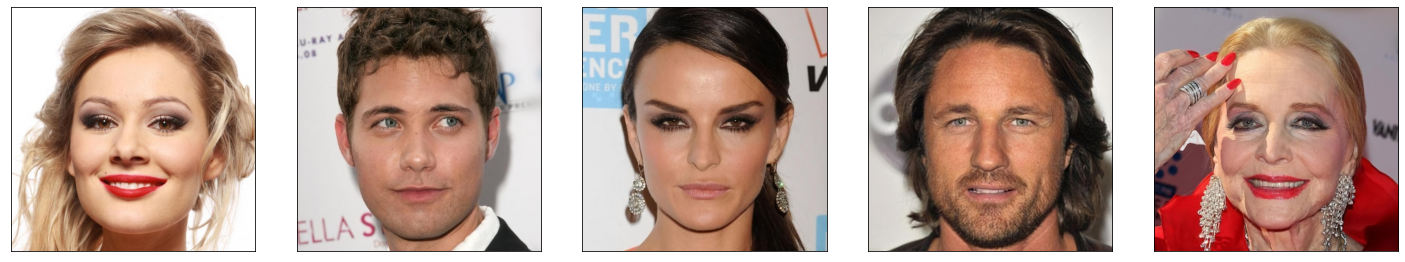

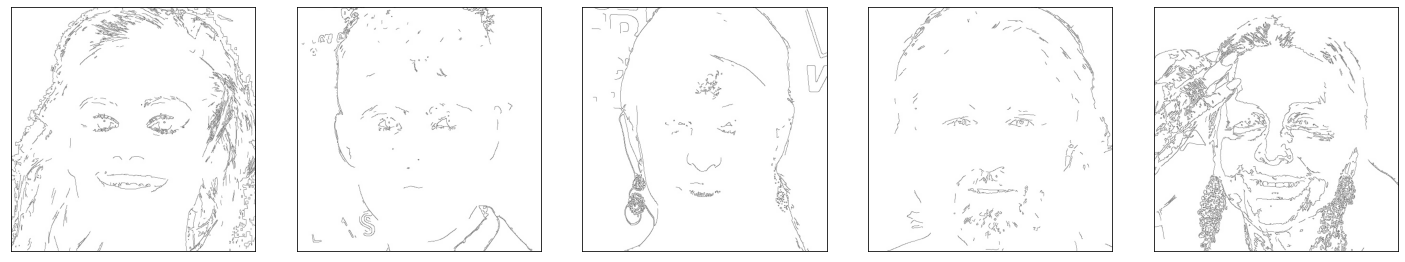

In [17]:
display(train_image_file_names[:5], os.path.join(folder_train, folder_photo))
display(train_image_file_names[:5], os.path.join(folder_train, folder_sketch))